In [2]:
from sensitivities.stochastic import sample, Gaussian, Uniform, Fixed
import matplotlib.pyplot as plt
import numpy as np

stochastic error propagation with correlations

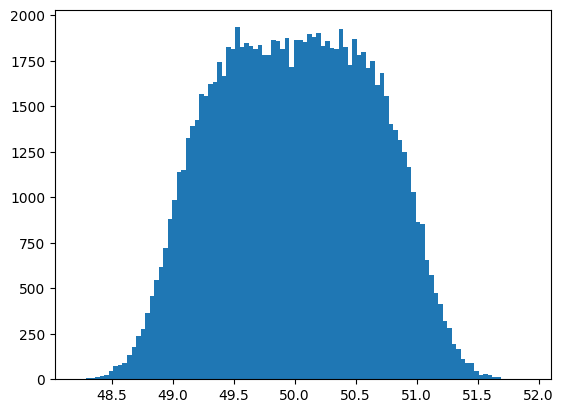

standard dev.: 0.629


In [3]:
def calibrate_signal(signal, gain, offset):
    return (signal - offset) / gain


# distributions for function parameters
parameters = [
    Fixed(100),
    Gaussian(2, 0.01),  # gain uncertainty
    Uniform(-2, 2),  # offset uncertainty
]

# correlation between function parameters
corr = [("gain", "offset", 0)]


# monte carlo error propagation
samples = sample(
    calibrate_signal,
    parameters,
    corr=corr,
    n=100000,
)

plt.hist(np.array(samples), 100)
plt.show()

print(f"standard dev.: {np.std(samples):1.3f}")

compare to error propagation from linear sensitivities 

In [4]:
from sensitivities.linear import propagate_errors

f_error = propagate_errors(
    calibrate_signal,
    errors=[p.std() for p in parameters],
    x0=[p.mean() for p in parameters],
    corr=[[1, 0, 0], [0, 1, corr[0][2]], [0, corr[0][2], 1]],
)
print(f"linearly propagated error (1sigma): {f_error:1.3f}")

linearly propagated error (1sigma): 0.629
